In [96]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


# House Price prediction with PyTorch Linear Regression 



# Getting Started

In [180]:
# importing libraries
import torch.nn as nn
import torch.nn.functional as F


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [185]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Preprocessing


In [187]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Drop unnecessary columns

- Date
- zip code
- year renovated

In [188]:
data = data.drop('date', axis=1)

data = data.drop('zipcode', axis=1)

data.drop('yr_renovated', axis=1)

data.drop('id', axis=1)

data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [189]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## **Split Data to X and Y features, and then Scale it**

### Split the data to `X` and `Y`

In [190]:
y = data['price'].copy()
X = data.drop('price', axis=1).copy()

# **Visualize the data**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'frequency')

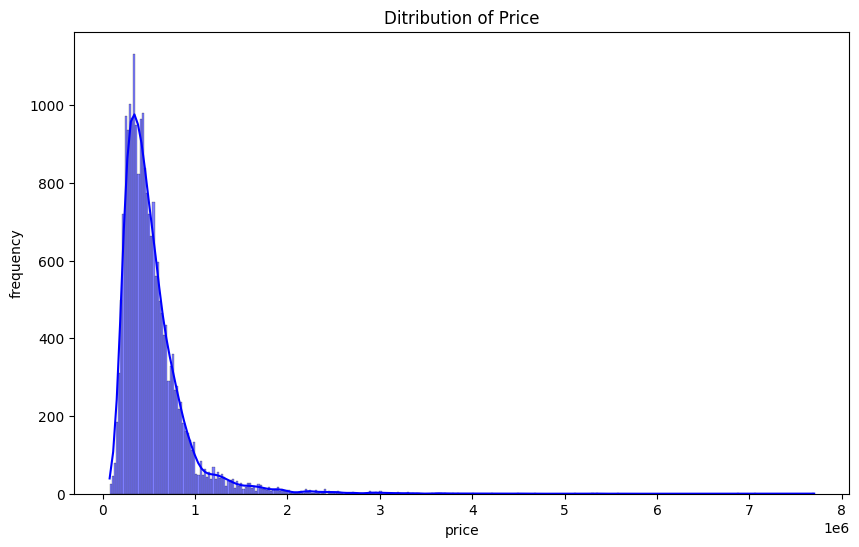

In [191]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Ditribution of Price')
plt.xlabel('price')
plt.ylabel('frequency')

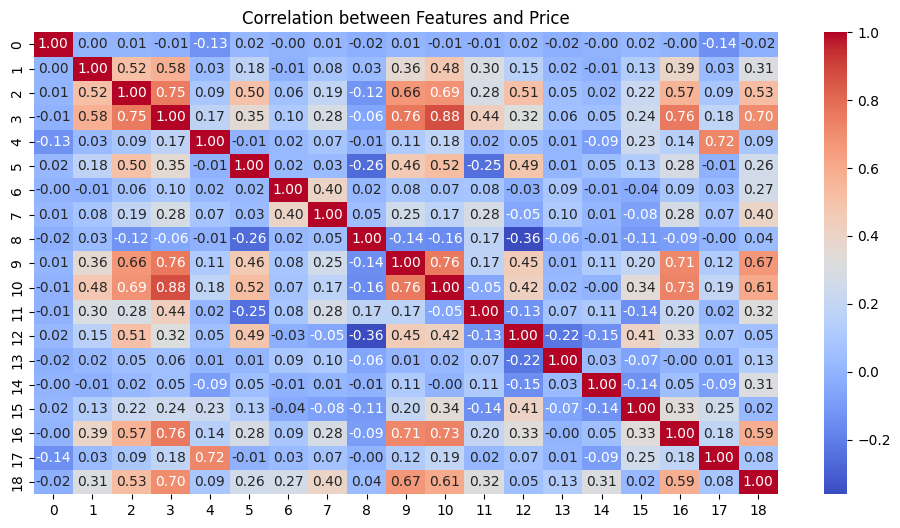

In [192]:
plt.figure(figsize=(12,6))

correlation_matrix = np.corrcoef(X.T, y)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Features and Price')
plt.show()

## interpretation of data:

From the data we can see the columns that have the highest correlation with the price of the house, and those are, the ones with red/orange colors. and these columns include:

- bedrooms
- bathrooms
- condition
- grade
- longitude

In [193]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

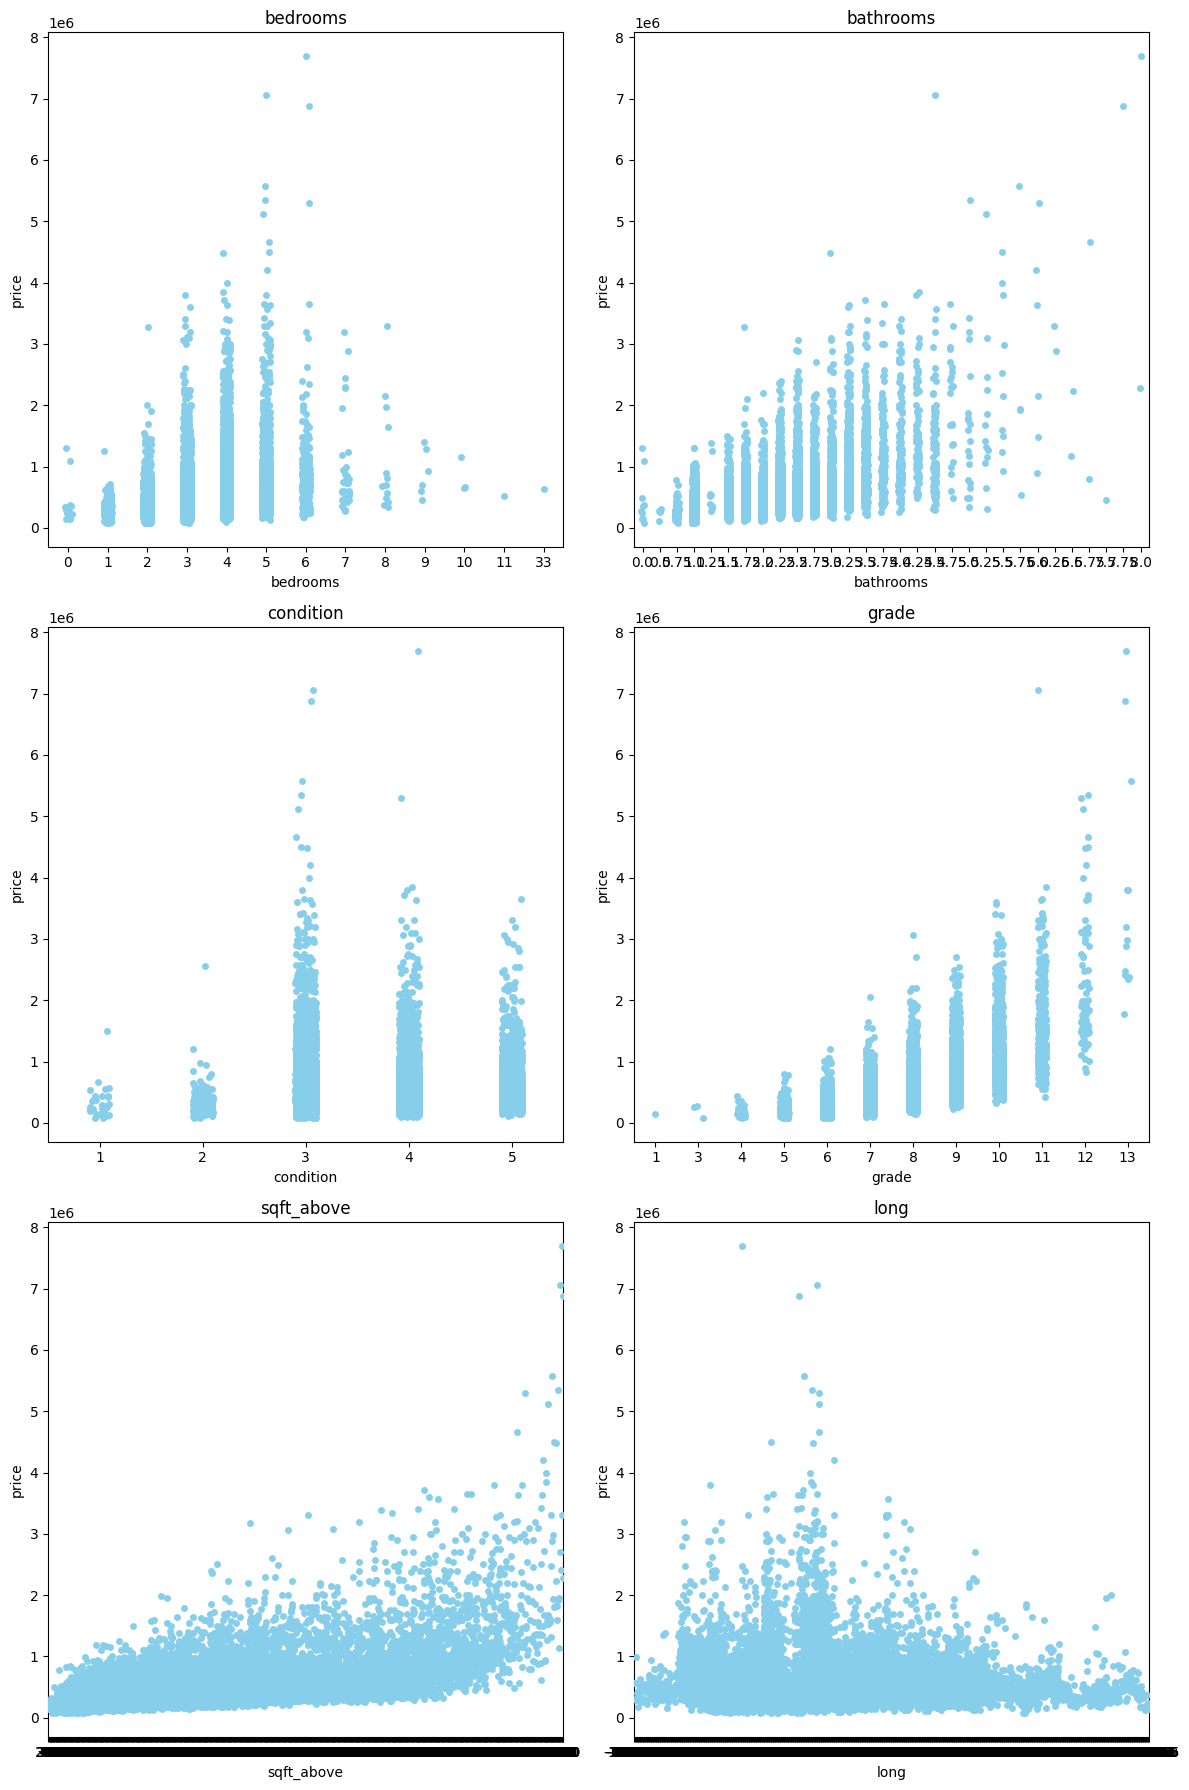

In [194]:
plt.figure(figsize=(12, 18))

# First subplot for feature1
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot index 1
sns.stripplot(x=data['bedrooms'], y=data['price'], color='skyblue')
plt.title('bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')

# Second subplot for feature2
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot index 2
sns.stripplot(x=data['bathrooms'], y=data['price'], color='skyblue')
plt.title('bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')

# Third subplot for feature3
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot index 3
sns.stripplot(x=data['condition'], y=data['price'], color='skyblue')
plt.title('condition')
plt.xlabel('condition')
plt.ylabel('price')

# Fourth subplot for feature4
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot index 4
sns.stripplot(x=data['grade'], y=data['price'], color='skyblue')
plt.title('grade')
plt.xlabel('grade')
plt.ylabel('price')

# Fifth subplot for feature5
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot index 5
sns.stripplot(x=data['sqft_above'], y=data['price'], color='skyblue')
plt.title('sqft_above')
plt.xlabel('sqft_above')
plt.ylabel('price')

# Sixth subplot for feature6
plt.subplot(3, 2, 6)  # 3 rows, 2 columns, subplot index 6
sns.stripplot(x=data['long'], y=data['price'], color='skyblue')
plt.title('long')
plt.xlabel('long')
plt.ylabel('price')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


### Scale the data
Scaling `X` gives each column in `X` a mean of 0 and variance of 1

we'll use StandardScaler from `sklearn`

In [195]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

### **Split The data to train and test with test at 70%**

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

# Training PyTorch Model

In [197]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(18, 64)
        # first layer is linear layer with 18 inputs and 64 outputs
        self.layer2 = nn.Linear(64, 64)
        # second layer is linear layer with 32 inputs and 32 ouputs
        self.layer3 = nn.Linear(64, 32)
        # third layer is still linear layer, but with 32 inputs and 16 outputs
        self.layer4 = nn.Linear(32, 16)
        # fourth layer is still linear layer, but with 32 inputs and 16 outputs
        self.out = nn.Linear(16, 1)
        # output layer is linear layer with 16 inputs and 1 outputs
    
    # feed forward function
    # it takes some vector x, which is a feature vector
    def forward(self, x):
        # we use F from the functional package
        # we use it to give relu activation to layer 1, 2, 3, 4
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = self.out(x)
        return x

In [202]:
# parameter size of each layer
neuralNet = NeuralNetwork()
for i in range(len(list(neuralNet.parameters()))):
    print(list(neuralNet.parameters())[i].shape)

torch.Size([64, 18])
torch.Size([64])
torch.Size([64, 64])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([16, 32])
torch.Size([16])
torch.Size([1, 16])
torch.Size([1])


In [203]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train)).type(torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test)).type(torch.float32)

## Optimizer (Gradient Descent) and Criterion (Loss Function)

In [204]:
optimizer = torch.optim.Adam(neuralNet.parameters(), lr=0.1)
criterion = nn.MSELoss()

## Training it with epochs

In [205]:
for x, target in zip(X_train_tensor, y_train_tensor):
    optimizer.zero_grad()
    output = neuralNet(x)
    loss = criterion(output, target)
    
    # backpropagation
    loss.backward()
    optimizer.step()

# Predict with model:

In [206]:
predictions = []
with torch.no_grad():
    for x in X_test_tensor:
        output = neuralNet(x)
        predictions.append(output.item())
        

# Visualizations of the predictions

Visualizing the more prominent features of the house agains the price, using the plots used before, but now with the output of the model shown along with the original values. 

the blue values show the dataset, and the red values show the predictions of the model.

as we can see on the graph, the predictions fit well with the graph, and they fit the shape of the graph.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

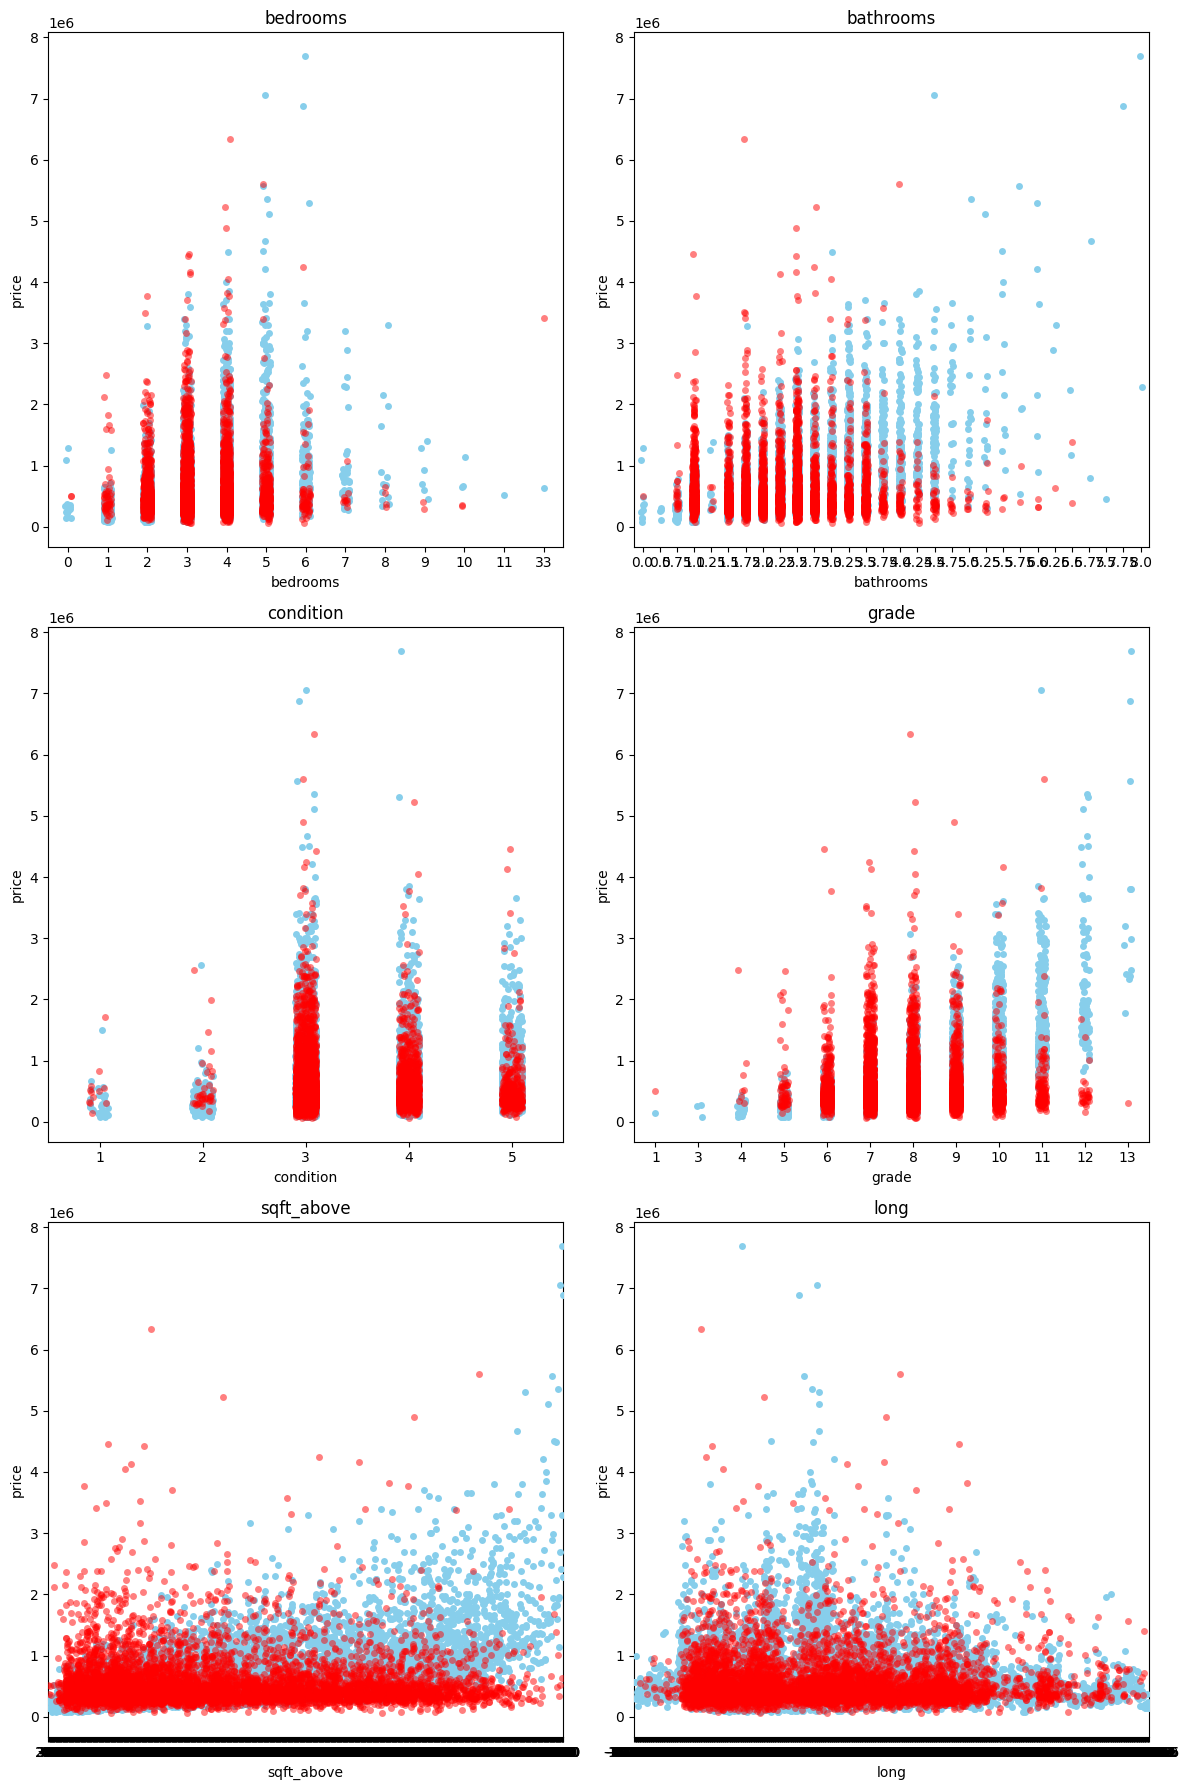

In [207]:
plt.figure(figsize=(12, 18))

# First subplot 
plt.subplot(3, 2, 1)
sns.stripplot(x=data['bedrooms'], y=data['price'], color='skyblue')
sns.stripplot(x=data['bedrooms'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('bedrooms')

# Second subplot 
plt.subplot(3, 2, 2)
sns.stripplot(x=data['bathrooms'], y=data['price'], color='skyblue')
sns.stripplot(x=data['bathrooms'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('bathrooms')

# Third subplot 
plt.subplot(3, 2, 3)
sns.stripplot(x=data['condition'], y=data['price'], color='skyblue')
sns.stripplot(x=data['condition'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('condition')

# Fourth subplot
plt.subplot(3, 2, 4)
sns.stripplot(x=data['grade'], y=data['price'], color='skyblue')
sns.stripplot(x=data['grade'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('grade')

# Fifth subplot
plt.subplot(3, 2, 5)
sns.stripplot(x=data['sqft_above'], y=data['price'], color='skyblue')
sns.stripplot(x=data['sqft_above'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('sqft_above')

# Sixth subplot
plt.subplot(3, 2, 6)
sns.stripplot(x=data['long'], y=data['price'], color='skyblue')
sns.stripplot(x=data['long'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('long')

plt.tight_layout()
plt.show()